# Manual gene knockout

In [44]:
%%capture
%run gene_annotation.ipynb

from colorama import init, Fore, Style
from cobra.io import read_sbml_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

model = read_sbml_model('Files/iCGB21FR.xml')


### Adding the export reaction of lysine

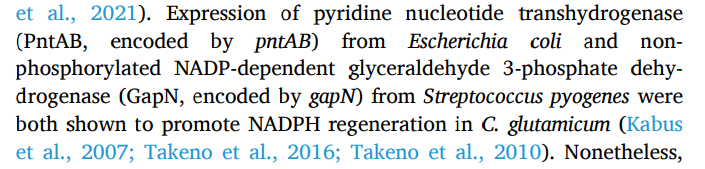

In [53]:
model.reactions.LYSt3pp

Reaction identifier,LYSt3pp
Name,L-lysine transport out via proton antiport (cytoplasm to periplasm)
Memory address,0x1fabe25f850
Stoichiometry,h_p + lys__L_c --> h_c + lys__L_p H+ + L-Lysine --> H+ + L-Lysine
GPR,lcl_NC_006958_1_prot_WP_003854734_1_1226
Lower bound,0.0
Upper bound,1000.0


In [ ]:
dmapps = cobra.core.Reaction(id = 'DMAPPS', name = 'Isopentenyl-diphosphate isomerase' , lower_bound = 0 , upper_bound = 1000 )
dmapps.add_metabolites({isopentenyl : -1, dmapp:1}, reversibly = False)
dmapps.gene_reaction_rule = '(fcd1)'


In [43]:
model.objective = model.reactions.DAPDC
solution = model.optimize()

initial_growth, initial_lysine = solution['Growth'], solution['DAPDC']

print(f"Initial growth: {round(initial_growth, 6)}")
print(f"Initial lysine: {round(initial_lysine, 6)}")

# Optimizing with 80% of the initial growth
model.reactions.Growth.bounds = (0, initial_growth*0.8)
model.objective = model.reactions.DAPDC
solution_2 = model.optimize()

print(f"New growth: {round(solution_2['Growth'], 6)}")
print(f"New lysine: {round(solution_2['DAPDC'], 6)}")

Initial growth: 0.57066
Initial lysine: 0.189644
New growth: 0.456528
New lysine: 0.151715


In [3]:

results = {}

for gene in model.genes:
    with model:
        gene.knock_out()
        
        protein_id = getProteinID(gene.id)
        solution = model.optimize()
        results[protein_id] = {"growth": solution["Growth"], "lysine": solution["DAPDC"]} 



In [4]:
results

{'WP_011015468': {'growth': 0.5706600731225523, 'lysine': 0.1896438280617524},
 'WP_003855288': {'growth': 0.5706600731225566, 'lysine': 0.18964382806175384},
 'WP_011013917': {'growth': 0.570660073122553, 'lysine': 0.18964382806175262},
 'WP_003859251': {'growth': 0.5706600731225566, 'lysine': 0.18964382806175384},
 'WP_011015386': {'growth': 0.5706600731225566, 'lysine': 0.18964382806175384},
 'WP_003859243': {'growth': 0.5706600731225566, 'lysine': 0.18964382806175384},
 'WP_011265680': {'growth': 0.5706600731225566, 'lysine': 0.18964382806175384},
 'WP_011014966': {'growth': 0.5706600731225566, 'lysine': 0.18964382806175384},
 'WP_003857140': {'growth': 0.5706600731225566, 'lysine': 0.18964382806175384},
 'WP_011015481': {'growth': 0.5706600731225566, 'lysine': 0.18964382806175384},
 'WP_003859586': {'growth': 0.5706600731225566, 'lysine': 0.18964382806175384},
 'WP_011015122': {'growth': 0.5706600731225566, 'lysine': 0.18964382806175384},
 'WP_011013682': {'growth': 0.570660073122

In [ ]:
df = pd.DataFrame.from_dict(essentiality, orient='index')
df = df.rename(columns={0: 'Growth'})
df = df.sort_values('Growth')